<a href="https://colab.research.google.com/github/FuRong1213-vibenshus/simulation/blob/main/envelop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Break down the problem of simulating the envelope game to determine if the strategy of rejecting a little over a third of the envelope and then following the rest of the protocol gets you the highest value about a third of the time. These subtasks can include things like generating a sequence of envelopes, rejecting a fraction p of them, and sequentially picking envelopes till one higher than a specific value is found. For each subtask, identify the inputs, outputs and the method.

In [2]:
import random
NUM_OF_TEST = 2000
MAX_VALUE=1000
REJECT_FRACTION=0.3
DROP_IDX=int(MAX_VALUE*REJECT_FRACTION)
class Envelop():
  def __init__(self, value):
    """ Initialize the value of envelops. """
    self.value = value

class MaxValued():
  def __init__(self, maxvalue=0):
    self.maxvalue = maxvalue
  def get_max_value(self, enevlop):
    if self.maxvalue < enevlop.value:
      self.maxvalue = enevlop.value

num_of_sucess = 0
envelop_list = []
record = MaxValued();

for i in range(NUM_OF_TEST):
  record.maxvalue=0;
  envelop_list[:] = []
  for j in range(MAX_VALUE):
    envelop_list.append(Envelop(j+1))

  for l in range(MAX_VALUE, 0, -1):
    idx = random.randint(0, l-1)
    a_envelop = envelop_list[idx]

    if (a_envelop.value == MAX_VALUE) and \
       (l>=MAX_VALUE-DROP_IDX):
       break
    elif (l< MAX_VALUE-DROP_IDX) and \
       a_envelop.value > record.maxvalue and \
       a_envelop.value < MAX_VALUE:
       break
    elif (l< MAX_VALUE-DROP_IDX) and \
       (a_envelop.value == MAX_VALUE):
       num_of_sucess +=1
       break
    else:
      record.get_max_value(a_envelop)
      del envelop_list[idx]
print("sucessful rate is :", num_of_sucess/float(NUM_OF_TEST))

sucessful rate is : 0.3795


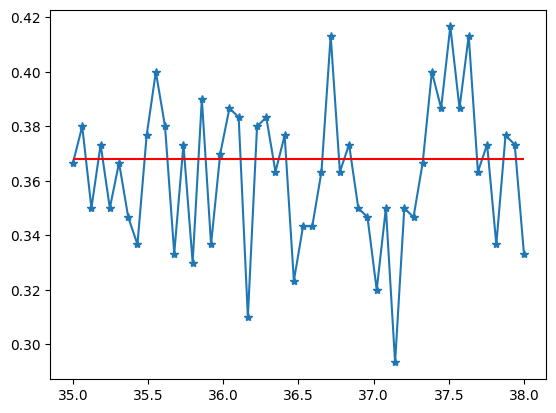

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
NUM_OF_TEST = 300
MAX_VALUE=500
DROP_IDX=int(MAX_VALUE*REJECT_FRACTION)

success_rate = []
num_of_success = 0
line_space = np.linspace(35.0,38.0,50)
random_list = list(range(1,MAX_VALUE+1))

for drop_fraction in line_space:
  num_of_success = 0
  DROP_IDX=int(MAX_VALUE*drop_fraction/100.0)
  for i in range(NUM_OF_TEST):
    #random_list = random.sample(range(1, MAX_VALUE+1), MAX_VALUE)
    random.shuffle(random_list)
    droped_list = np.array(random_list[0:DROP_IDX])
    keeped_list = np.array(random_list[DROP_IDX:])
    rejected_max = droped_list.max()
    if (rejected_max == MAX_VALUE):
      continue
    elif keeped_list[keeped_list>rejected_max][0] == MAX_VALUE :
      num_of_success +=1
  #print("sucessful rate for ", drop_fraction/100.0 , num_of_sucess/float(NUM_OF_TEST))
  success_rate.append(num_of_success/float(NUM_OF_TEST))

plt.plot(line_space, success_rate, '*-')
plt.hlines(y=1/math.e, xmin=35, xmax=38, color='r')

In [16]:
import math
1/math.e

0.36787944117144233